In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import pylab

import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
loans_income = pd.read_csv('/content/sample_data/loans_income.csv')
sp500_px = pd.read_csv('/content/sample_data/sp500_px.csv')

In [4]:
loans_income.shape

(50000, 1)

In [5]:
#Take a 1000 Samples
samples = loans_income.sample(n=1000)
samples.shape

(1000, 1)

In [7]:
samples.head()

,x
15629,42542
10877,110000
15363,50000
22507,36000
37585,60000


In [9]:
samples.tail()

,x
25949,118000
39020,40000
45167,60000
8160,24000
24371,150000


In [10]:
#mean of 5 numbers
sample_mean_5 = samples.rolling(5).mean().x
sample_mean_5

15629        NaN
10877        NaN
15363        NaN
22507        NaN
37585    59708.4
          ...   
25949    69000.0
39020    66000.0
45167    66400.0
8160     59400.0
24371    78400.0
Name: x, Length: 1000, dtype: float64

In [11]:
sample_mean_5.shape

(1000,)

In [12]:
sample_mean_5 = sample_mean_5.dropna()
sample_mean_5

37585    59708.4
15632    55800.0
9083     48200.0
32276    57400.0
24916    60800.0
          ...   
25949    69000.0
39020    66000.0
45167    66400.0
8160     59400.0
24371    78400.0
Name: x, Length: 996, dtype: float64

In [13]:
sample_mean_5.shape

(996,)

In [14]:
#mean of 20 numbers
sample_mean_20 = samples.rolling(20).mean().x
sample_mean_20

15629        NaN
10877        NaN
15363        NaN
22507        NaN
37585        NaN
          ...   
25949    67700.0
39020    65750.0
45167    65000.0
8160     65000.0
24371    68200.0
Name: x, Length: 1000, dtype: float64

In [15]:
sample_mean_20.shape

(1000,)

In [16]:
sample_mean_20 = sample_mean_20.dropna()
sample_mean_20

30356    65452.3
37790    68325.2
26733    65790.2
572      67140.2
7266     70590.2
          ...   
25949    67700.0
39020    65750.0
45167    65000.0
8160     65000.0
24371    68200.0
Name: x, Length: 981, dtype: float64

In [17]:
sample_mean_20.shape

(981,)

In [18]:
# mean of 30 numbers
sample_mean_30 = samples.rolling(30).mean().x
sample_mean_30

15629             NaN
10877             NaN
15363             NaN
22507             NaN
37585             NaN
             ...     
25949    69310.033333
39020    68866.666667
45167    69033.333333
8160     66500.000000
24371    66500.000000
Name: x, Length: 1000, dtype: float64

In [19]:
sample_mean_30.shape

(1000,)

In [20]:
sample_mean_30 = sample_mean_30.dropna()
sample_mean_30

22698    69279.666667
9489     71528.266667
43351    71594.933333
7303     72661.600000
11500    73128.266667
             ...     
25949    69310.033333
39020    68866.666667
45167    69033.333333
8160     66500.000000
24371    66500.000000
Name: x, Length: 971, dtype: float64

In [21]:
sample_mean_30.shape

(971,)

Text(0.5, 1.0, 'Full Plot of the whole DATAFRAME')

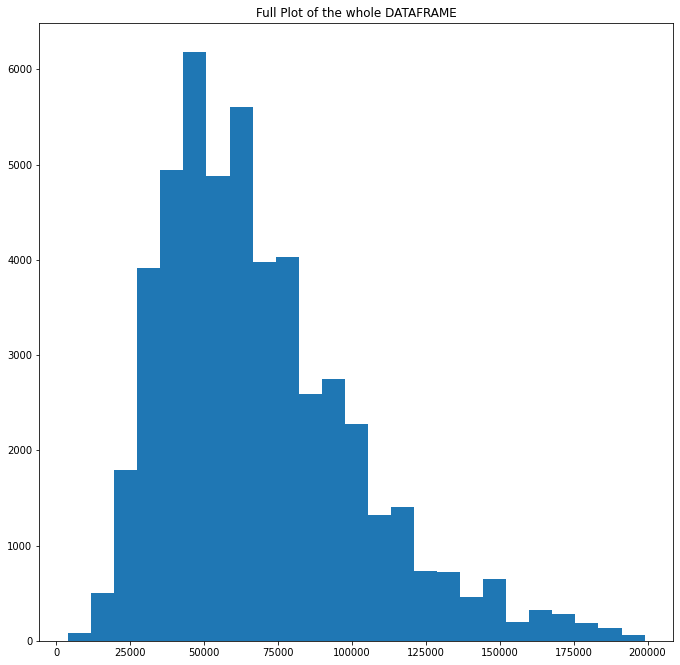

In [27]:
fig = plt.figure(figsize=(25,25))
#The full distribution of the plot:
ax = fig.add_subplot(2,2,1)
ax.hist(loans_income.x,bins=25)   # y axis diff is 25 
plt.title('Full Plot of the whole DATAFRAME')

Text(0.5, 1.0, 'Full Plot of the 1000 samples')

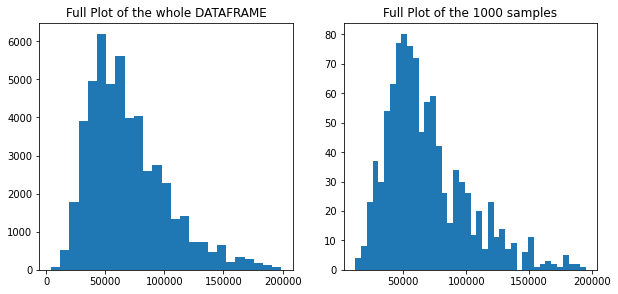

In [28]:
fig = plt.figure(figsize=(10,10))
#The full distribution of the plot:
ax = fig.add_subplot(2,2,1)
ax.hist(loans_income.x,bins=25)   # y axis diff is 25 
plt.title('Full Plot of the whole DATAFRAME')

#distribution of 1000 samples:
ax = fig.add_subplot(2,2,2)
ax.hist(samples.x,bins=40)
plt.title('Full Plot of the 1000 samples')

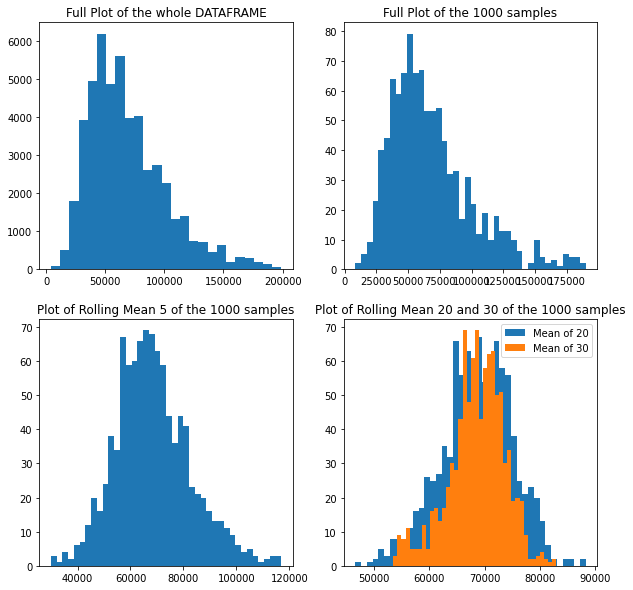

In [29]:

#Calculating a rolling mean:

#Take a 1000 Samples
samples = loans_income.sample(n=1000)

#mean of 5 numbers
sample_mean_5 = samples.rolling(5).mean().x
sample_mean_5 = sample_mean_5.dropna()

#mean of 20 numbers
sample_mean_20 = samples.rolling(20).mean().x
sample_mean_20 = sample_mean_20.dropna()

# mean of 30 numbers
sample_mean_30 = samples.rolling(30).mean().x
sample_mean_30 = sample_mean_30.dropna()

fig = plt.figure(figsize=(10,10))
#The full distribution of the plot:
ax = fig.add_subplot(2,2,1)
ax.hist(loans_income.x,bins=25)
plt.title('Full Plot of the whole DATAFRAME')

#distribution of 1000 samples:

ax = fig.add_subplot(2,2,2)
ax.hist(samples.x,bins=40)
plt.title('Full Plot of the 1000 samples')

#distribution of means of 5 numbers from 1000 samples:
ax = fig.add_subplot(2,2,3)
ax.hist(sample_mean_5,bins=40)
plt.title('Plot of Rolling Mean 5 of the 1000 samples')

#distribution of means of 20 numbers from 1000 samples:
ax = fig.add_subplot(2,2,4)
ax.hist(sample_mean_20,bins=40,label='Mean of 20')
ax.hist(sample_mean_30,bins=40,label='Mean of 30')
plt.title('Plot of Rolling Mean 20 and 30 of the 1000 samples')
ax.legend()
plt.show()

plt.show()

In [30]:
#Calculating a rolling mean:
print('Total Population STD : ',loans_income.x.std())
print('Total Population Mean : ',loans_income.x.mean())
print('Total Population Median : ',np.median(loans_income.x))
print('Total Population Standard Error:',stats.sem(loans_income.x, ddof=1))

Total Population STD :  32872.03536985002
Total Population Mean :  68760.51844
Total Population Median :  62000.0
Total Population Standard Error: 147.00821129152527


In [31]:
bootstrap_1000 = np.random.choice(loans_income.x,size=1000,replace=True)
bootstrap_10000 = np.random.choice(loans_income.x,size=10000,replace=True)
bootstrap_20000 = np.random.choice(loans_income.x,size=20000,replace=True)
arr_bootstraps = [bootstrap_1000,bootstrap_10000,bootstrap_20000]
len(arr_bootstraps)

3

In [32]:
#Calculating a rolling mean:
for i in range(len(arr_bootstraps)):
    print('Bootstrap Stats for {} examples \n'.format(len(arr_bootstraps[i])))
    print('------------------------------------------------------------------------------\n')
    print('Bootstrap STD : ',np.std(arr_bootstraps[i],ddof=1))
    print('Bootstrap Mean : ',np.mean(arr_bootstraps[i]))
    print('Bootstrap Median: ',np.median(arr_bootstraps[i]))
    print('Boostrap Bias, ',loans_income.x.mean() - np.mean(arr_bootstraps[i],axis=0))
    print('Standard Error:',stats.sem(arr_bootstraps[i], ddof=1))
    print('\n------------------------------------------------------------------------------\n')
    #bias = lesser number for all three i.e 1000 10000 20000
    #standard error= greater number for all three i.e 1000 10000 20000

Bootstrap Stats for 1000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  32485.073181425363
Bootstrap Mean :  68576.429
Bootstrap Median:  62000.0
Boostrap Bias,  184.0894399999961
Standard Error: 1027.2682121055636

------------------------------------------------------------------------------

Bootstrap Stats for 10000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  33152.05996840676
Bootstrap Mean :  69027.6777
Bootstrap Median:  62000.0
Boostrap Bias,  -267.15926000000036
Standard Error: 331.5205996840676

------------------------------------------------------------------------------

Bootstrap Stats for 20000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  32968.07511344748
Bootstrap Mean :  68522.16115
Bootstrap Median:  61000.0
Boostrap Bias,  238.35728999999992
Standard Error: 233.1194947538617

-----

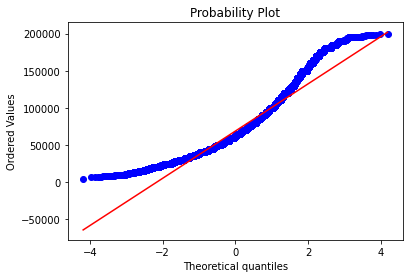

In [35]:
stats.probplot(loans_income.x, dist="norm", plot=pylab)   #dist = distribution
pylab.show()

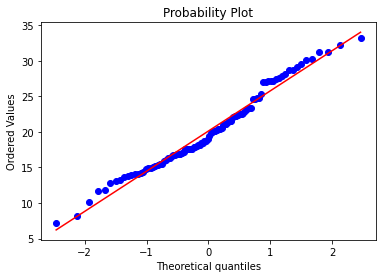

In [36]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [37]:
nflx = sp500_px.loc[:,'NFLX']

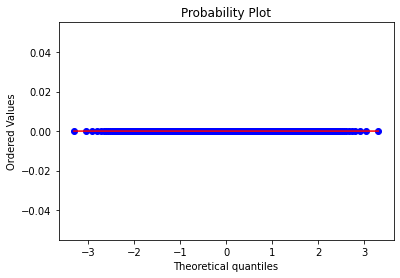

In [38]:
stats.probplot(nflx, dist="norm", plot=pylab)
pylab.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:1280: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


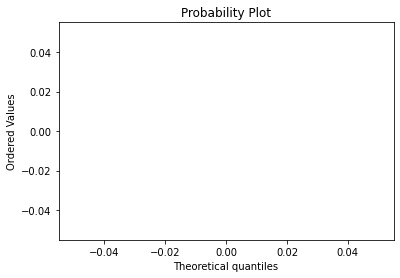

In [41]:
treated_nflx = np.diff(np.log(nflx))
stats.probplot(treated_nflx, dist="norm", plot=pylab,fit=True)
pylab.show()